## Module 20 Challenge- Unsupervised Machine Learning Challenge

### By: Zack Crowley

### Import the dependencies and data:

In [1]:
# Import dependencies:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

- 1. Read myopia.csv into a Pandas DataFrame.

In [2]:
# Read in the data:
file_path = Path("Resources/myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Check for NAs, duplicates and get the shape of the data:
print(f'The shape of the myopia data is: {myopia_df.shape}')
print(f'The number of NAs in the myopia data: {myopia_df.isnull().sum()}')
print(f'The duplicate rows of NAs in the myopia data: {myopia_df.duplicated().sum()}')
# There are 15 columns, 618 rows, and no NAs or duplicates in the myopia dataset.
# 14 features and 1 target/label (MYOPIC).


The shape of the myopia data is: (618, 15)
The number of NAs in the myopia data: AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64
The duplicate rows of NAs in the myopia data: 0


In [4]:
# Check out the summary of the data using the describe function:
myopia_df.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [5]:
# Save the myopia column as a series in case needed later:
labels = myopia_df['MYOPIC']

- 2. Remove the "MYOPIC" column from the dataset.

In [6]:
# Drop MYOPIC col:
df = myopia_df.drop("MYOPIC", axis='columns')
df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [7]:
df.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

- 3. Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with smaller values.

In [8]:
# Create a scaler to standardize the data:
# Create a StandardScaler() model and fit it to the training data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR', 'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])
scaled_df

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

In [9]:
# Create a new df from the scaled data:
new_df = pd.DataFrame(scaled_df)
# Rename the columns:
new_df.rename(columns={0: "AGE", 1: "SPHEQ", 2: "AL", 3: "ACD", 4: "LT", 5: "VCD", 6: "SPORTHR", 7: "READHR", 8: "COMPHR", 9: "STUDYHR", 10: "TVHR",11: "DIOPTERHR", 12: "MOMMY", 13: "DADMY"}, inplace=True)
new_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


In [10]:
# Save the clean and scaled DataFrame as a new CSV file for further use later:
file_path_new = Path("Resources/new_myopia_data.csv")
new_df.to_csv(file_path_new, index=False)

### Part 2: Apply Dimensionality Reduction

In [11]:
# Read in transformed data, which was previously cleaned and standardized:
file_path_clean = Path("Resources/new_myopia_data.csv")
myopia_clean_df = pd.read_csv(file_path_clean)
myopia_clean_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,-0.420219,-0.196686,-0.142410,0.366499,1.694021,-0.673220,-1.250096,-0.912062,1.602740,0.681765,0.884045,0.685585,0.987138,-0.996769
614,-0.420219,-0.217472,0.004738,-0.037486,-1.058674,0.276082,-0.747700,-0.912062,-0.361875,-0.672996,-0.165935,-0.999941,0.987138,1.003241
615,-0.420219,1.651696,0.652187,0.197086,-0.760735,0.773335,-0.496502,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,1.003241
616,-0.420219,-0.217472,-0.848716,0.475096,0.366251,-1.110201,0.005894,-0.259684,-0.361875,-0.672996,1.059042,-0.188392,-1.013030,-0.996769


- 1. Perform dimensionality reduction with PCA. How did the number of the features change?



In [12]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get the principal components for the data that preserves 90% of the explained variance: 
myopia_pca = pca.fit_transform(myopia_clean_df)
# Print out the array shape of the data after PCA tranformation:
print(f'PCA tranformation shape: {myopia_pca.shape}')

# Get the explained variance ratio and sum it across all of the principal components that were retained:
print(f'PCA tranformation retained {pca.explained_variance_ratio_.sum()} explained variance from the original dataset')

# Print out number of principal components retained by the PCA tranformation:
print(f'PCA tranformation retained {myopia_pca.shape[1]} principal components')

PCA tranformation shape: (618, 10)
PCA tranformation retained 0.9187361702915186 explained variance from the original dataset
PCA tranformation retained 10 principal components


In [13]:
# Transform PCA data to a DataFrame, with 10 principal components:
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", 
                              "principal component 6","principal component 7", "principal component 8","principal component 9", "principal component 10"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


##### Performing dimensionality reduction with PCA on the transformed myopia data dropped 4 columns and preserved 10 columns, changing the number of features from 14 to 10.

- 2. Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.



In [14]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=200, perplexity=40)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

# Check the number of features:
print(f'Shape of t-SNE transformation: {tsne_features.shape}')
# The dataset has 2 columns, so t-SNE transformation changed the features from 10 to 2.
# Print out the array shape of the data after PCA tranformation:
print(f't-SNE transformation retained {tsne_features.shape[1]} clusters')

/Users/zackwcrowley/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


Shape of t-SNE transformation: (618, 2)
t-SNE transformation retained 2 clusters


- 3. Create a scatter plot of the t-SNE output. Are there distinct clusters?



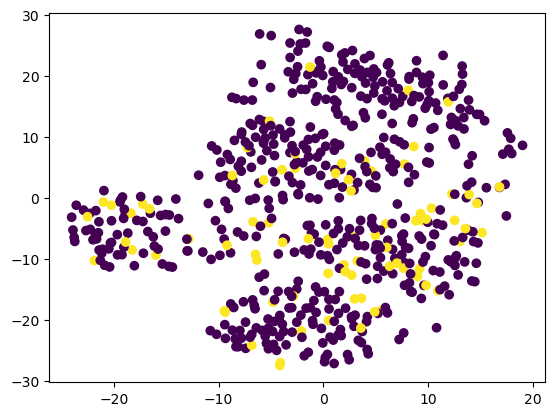

In [15]:
# Prepare to plot the dataset
# Set up an empty df:
df_tsne_plot = pd.DataFrame()
# The first column of transformed features
df_tsne_plot['x'] = tsne_features[:,0]

# The second column of transformed features
df_tsne_plot['y'] = tsne_features[:,1]

# Visualize the clusters, color them based on the labels from the original dataset MYOPIC column:
plt.scatter(df_tsne_plot['x'], df_tsne_plot['y'], c= labels)
plt.show()
# There does not appear to be two distinct clusters in the plot of the t-SNE transformed data, just one blob.

##### There are not distinct clusters when visualizing the t-SNE results (which reduced the features from 10 (PCA results) to 2).

### Part 3: Perform a Cluster Analysis with K-means
- Create an elbow plot to identify the best number of clusters. Make sure to do the following:

- Use a for loop to determine the inertia for each k between 1 through 10.

- If possible, determine where the elbow of the plot is, and at which value of k it appears.

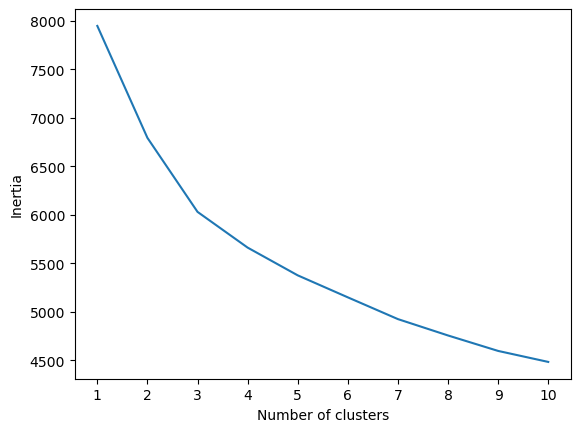

In [16]:
# Perform a Cluster Analysis with K-means on the PCA transformed data: df_myopia_pca
inertia = []
# Set up a list of 1-10 for K:
k = list(range(1, 11))


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# There may be an elbow at 3 clusters, run K-Means model with 3 clusters to check.

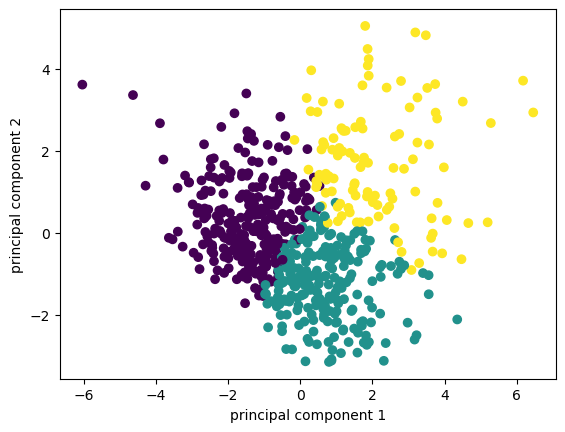

In [17]:
# There may be an elbow at 3 clusters, run K-Means model with 3 clusters to check:
# Initializing model with K = 3 picked from elbow curve
kmeans_model = KMeans(n_clusters=3, random_state=0)
# Fitting model:
kmeans_model.fit(df_myopia_pca)
# Get predictions:
predictions = kmeans_model.predict(df_myopia_pca)
# Add a new class column to df_myopia_pca:
df_myopia_pca["class"] = kmeans_model.labels_
# Create a two-dimensional scatter plot to analyze the clusters using x="principal component 1" and y="principal component 2"
plt.scatter(x=df_myopia_pca["principal component 1"], y=df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

### Part 4: Make a Recommendation
 - Based on your findings, write up a brief (one or two sentences) recommendation for your supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

Recommendation: 

    Based on the results of the cluster analysis using the K-means algorithm, there appears to be 3 clusters in the myopia dataset. My recommendation would be to confirm these results with a larger dataset since the plot with 2 features from the K-means model still showed some overlap of the clusters and because the elbow plot did not have show a very strong change at 3 clusters, it was just the most obvious change. 
    
    I would rate my confidence that there are 3 clusters in this dataset on a 7 out of 10, but I am confident enough to say that there should be further exploration of clustering the patients. This dataset just is too small to give a strong recommendation to cluster the myopia patients. 